<a href="https://colab.research.google.com/github/soumyakabi/mldata/blob/main/github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
url="https://github.com/soumyakabi/mldata/raw/main/transition.csv"
df1 = pd.read_csv(url)
df1


,Lithium,Boron,Phosphorus,Tg
0,0.50,0.500,0.000,693
1,0.00,1.000,0.000,533
2,0.02,0.980,0.000,528
3,0.04,0.960,0.000,543
4,0.06,0.940,0.000,558
...,...,...,...,...
61,0.25,0.225,0.525,707
62,0.25,0.150,0.600,704
63,0.25,0.075,0.675,726
64,0.60,0.360,0.040,618


Epoch 1/10000000
1/1 - 1s - loss: 447226.9062 - val_loss: 418727.9688 - 729ms/epoch - 729ms/step
Epoch 2/10000000
1/1 - 0s - loss: 447183.5625 - val_loss: 418683.2500 - 30ms/epoch - 30ms/step
Epoch 3/10000000
1/1 - 0s - loss: 447141.4688 - val_loss: 418636.4062 - 29ms/epoch - 29ms/step
Epoch 4/10000000
1/1 - 0s - loss: 447098.5312 - val_loss: 418590.3438 - 28ms/epoch - 28ms/step
Epoch 5/10000000
1/1 - 0s - loss: 447055.4688 - val_loss: 418544.6875 - 28ms/epoch - 28ms/step
Epoch 6/10000000
1/1 - 0s - loss: 447013.2500 - val_loss: 418500.1562 - 27ms/epoch - 27ms/step
Epoch 7/10000000
1/1 - 0s - loss: 446969.7812 - val_loss: 418454.0625 - 46ms/epoch - 46ms/step
Epoch 8/10000000
1/1 - 0s - loss: 446924.7812 - val_loss: 418406.4062 - 31ms/epoch - 31ms/step
Epoch 9/10000000
1/1 - 0s - loss: 446878.6562 - val_loss: 418358.0312 - 31ms/epoch - 31ms/step
Epoch 10/10000000
1/1 - 0s - loss: 446831.6875 - val_loss: 418308.9688 - 30ms/epoch - 30ms/step
Epoch 11/10000000
1/1 - 0s - loss: 446782.4375 

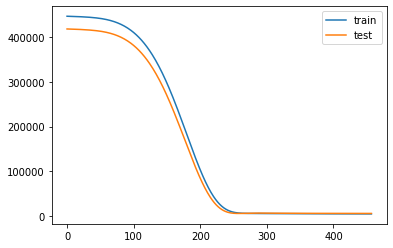

Training Set R-Square= 0.18134000556910723


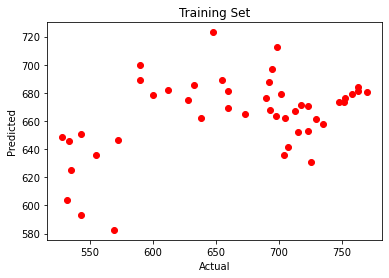

In [7]:
# imports
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
url="https://github.com/soumyakabi/mldata/raw/main/transition.csv"
df = pd.read_csv(url)
df.columns = df.columns.to_series().apply(lambda x: x.strip())
names = ['Lithium', 'Boron', 'Phosphorus', 'Tg']
target_column = ['Tg'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=3))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")
# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)